# Understanding the problem statement
we need to build a ML model which can predict the quality of wine for a wine manufacturing company.



###Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_df = pd.read_csv('/content/winequality-red.csv')

In [3]:
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.info()
# as we can see all data types are in correct formate and no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Visualization

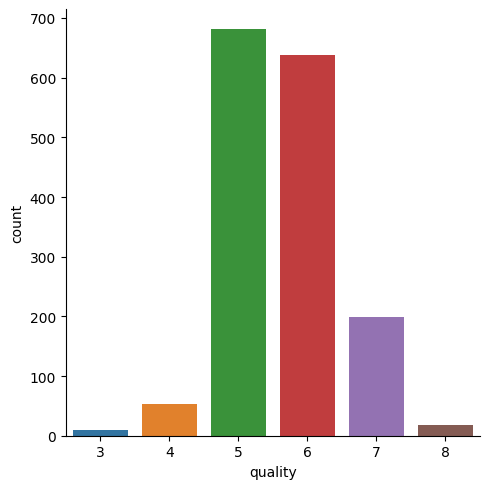

In [9]:
# count plot for different quality value

sns.catplot(x='quality', data = wine_df, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

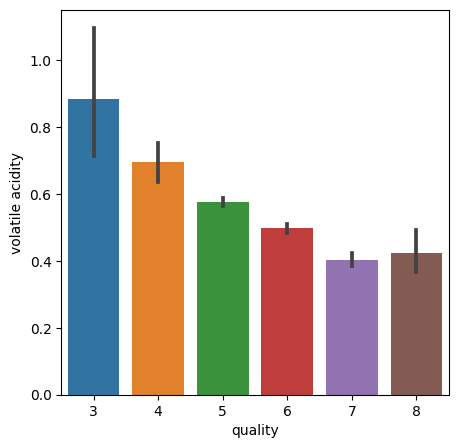

In [11]:
# volatile acedity vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data= wine_df)
# so lesser the value of volatile acidity more will be quality of wine

<Axes: xlabel='quality', ylabel='fixed acidity'>

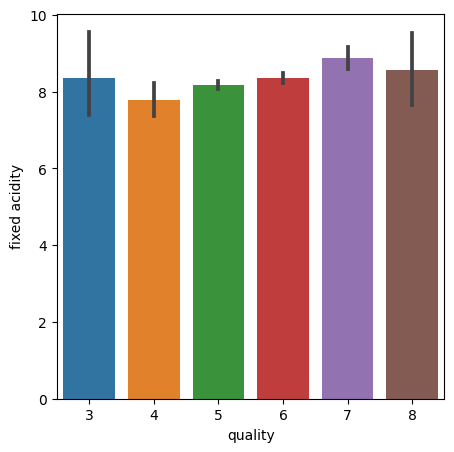

In [12]:
# fixed acidity vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity', data= wine_df)
# fixed acidity has almost similar value for all quality


In [13]:
# we can see correlation matrix
correlation_matrics = wine_df.corr()

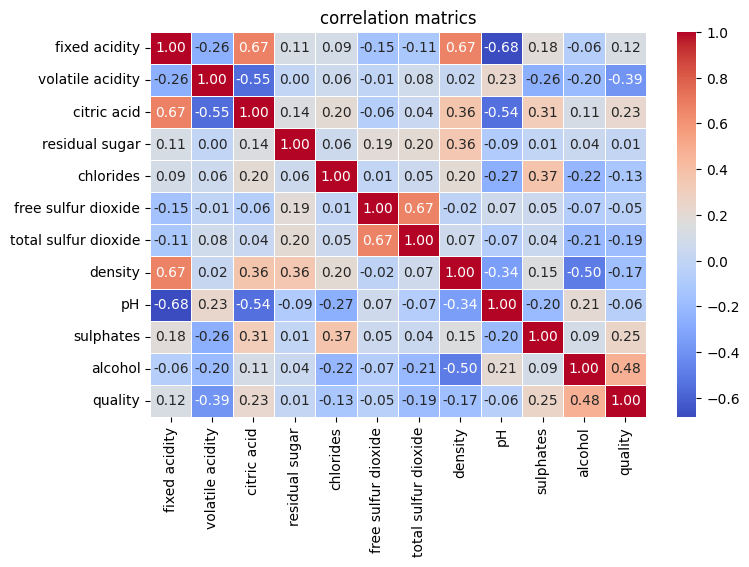

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrics, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('correlation matrics')
plt.show()

In [ ]:
# so we can say
'''Quality is positive related to
1.alcohol
2.sulphate
3.citric acid
4.residual sugar
5.fixed acidity
rest quality is negatively related '''


### Data preparation

In [17]:
X = wine_df.drop(columns='quality', axis=1)
Y = wine_df['quality']

In [19]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


### Label binarisation
this will convert our output column with two output

In [20]:
Y = wine_df['quality'].apply(lambda x: 1 if x>=7 else 0)

In [22]:
Y.sample(5)

1104    0
864     0
924     0
1164    0
1001    1
Name: quality, dtype: int64

In [26]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


### Model training

In [27]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)


RandomForestClassifier()

### Model evaluation

In [29]:
# Training Accuracy score
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction, Y_train)
print('Training accuracy :',training_accuracy )

Training accuracy : 1.0


In [30]:
# Testing Accuracy score
testing_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction, Y_test)
print('Testing accuracy :',testing_accuracy )

Testing accuracy : 0.934375


### making prediction system

In [31]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
